# importing the dependencies 

In [3]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pp
import numpy as nn
import matplotlib.pyplot as mm
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import seaborn as ss

In [5]:
a = pp.read_csv("train.csv")
a.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

# number of data points and the number of features

In [7]:
a.shape

(8523, 12)

In [9]:
a.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
a.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
a.isnull().sum() # so we have the null values at the item weight and the outlet size 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
a.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# categorical featurtes

In [15]:
"""
Item_Identifier  
Item_Fat_Content 
Item_Type
Outlet_Size      
Outlet_Identifier
Outlet_Location_Type        
Outlet_Type   

"""

'\nItem_Identifier  \nItem_Fat_Content \nItem_Type\nOutlet_Size      \nOutlet_Identifier\nOutlet_Location_Type        \nOutlet_Type   \n\n'

# handling the missing values

In [35]:
a['Item_Weight'].mean() # numerical data 

12.857645184135976

In [36]:
a['Outlet_Size'].mode() #categorical data

0    Medium
Name: Outlet_Size, dtype: object

In [37]:
#now replace those missing value by these values 


In [38]:
a['Item_Weight'].fillna(a['Item_Weight'].mean(), inplace = True )

In [39]:
a['Outlet_Size'].fillna(a['Outlet_Size'].mode(), inplace = True)

In [40]:
a.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [41]:
mode = a.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))

In [42]:
print(mode)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [43]:
miss_v = a['Outlet_Size'].isnull()
print(miss_v)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [44]:
a.loc[miss_v , 'Outlet_Size'] = a.loc[miss_v,'Outlet_Type'].apply(lambda x: mode)

In [45]:
a.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# data analysis

In [46]:
a.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


/var/folders/cc/g3cky7_j46jgfvq0rg9cht3h0000gn/T/ipykernel_31359/2760271111.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ss.distplot(a['Item_Weight'])


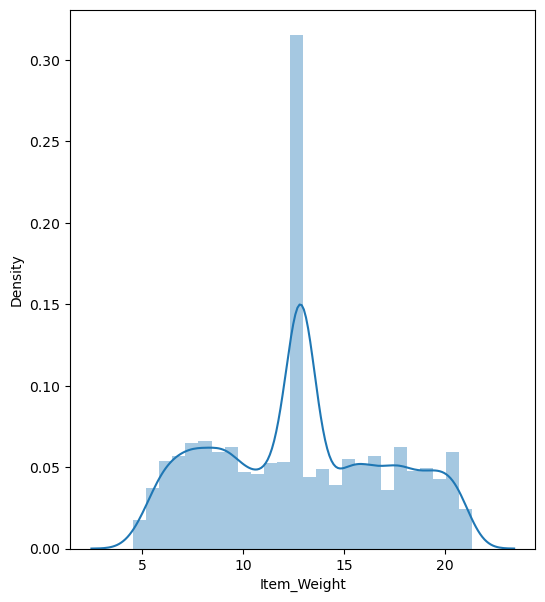

In [48]:
mm.figure(figsize = (6,7))
ss.distplot(a['Item_Weight'])
mm.show()

/var/folders/cc/g3cky7_j46jgfvq0rg9cht3h0000gn/T/ipykernel_31359/3394828683.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ss.distplot(a['Item_Visibility'])


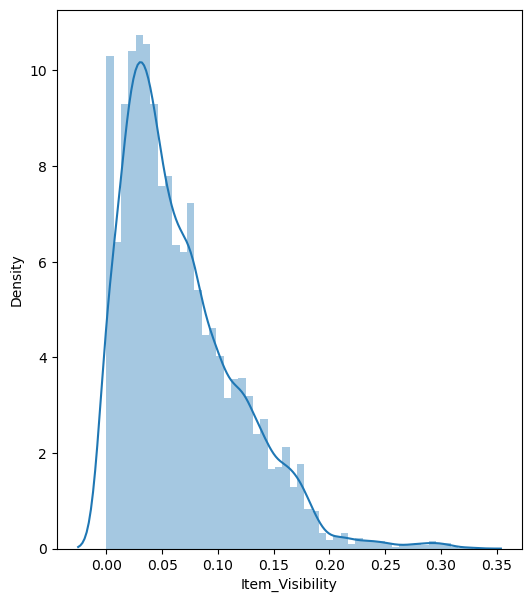

In [49]:
mm.figure(figsize = (6,7))
ss.distplot(a['Item_Visibility'])
mm.show()

/var/folders/cc/g3cky7_j46jgfvq0rg9cht3h0000gn/T/ipykernel_31359/1487933131.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ss.distplot(a['Item_MRP'])


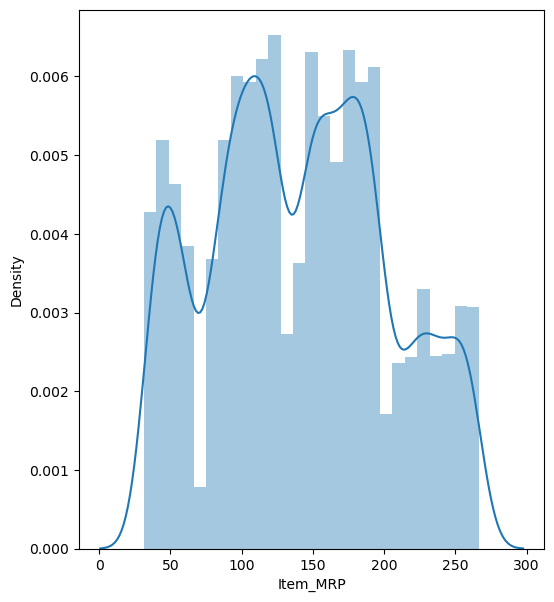

In [50]:
mm.figure(figsize = (6,7))
ss.distplot(a['Item_MRP'])
mm.show()

<Axes: xlabel='Outlet_Size'>

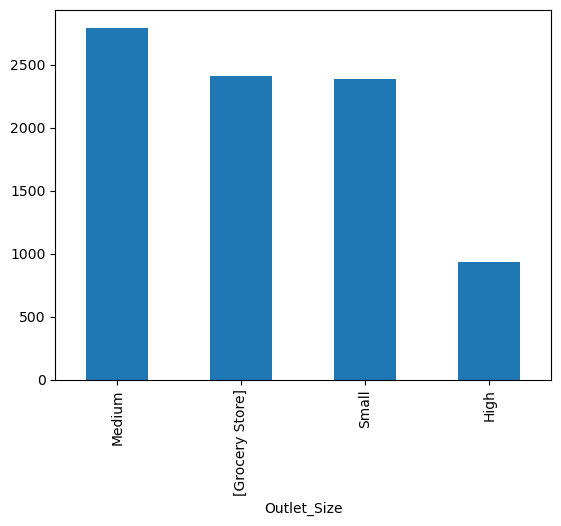

In [66]:
a['Outlet_Size'].value_counts().plot.bar()

<Axes: xlabel='Outlet_Establishment_Year'>

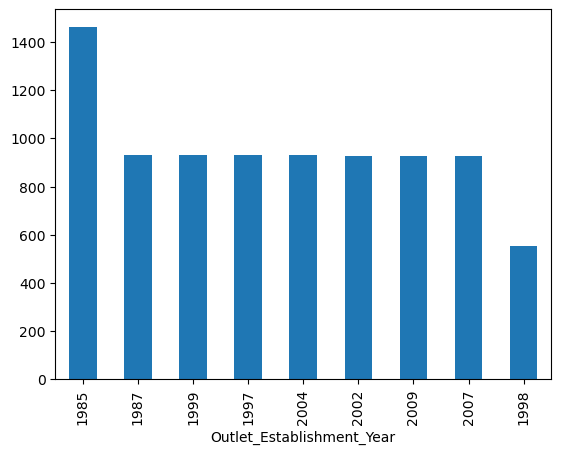

In [72]:
a['Outlet_Establishment_Year'].value_counts().plot.bar()

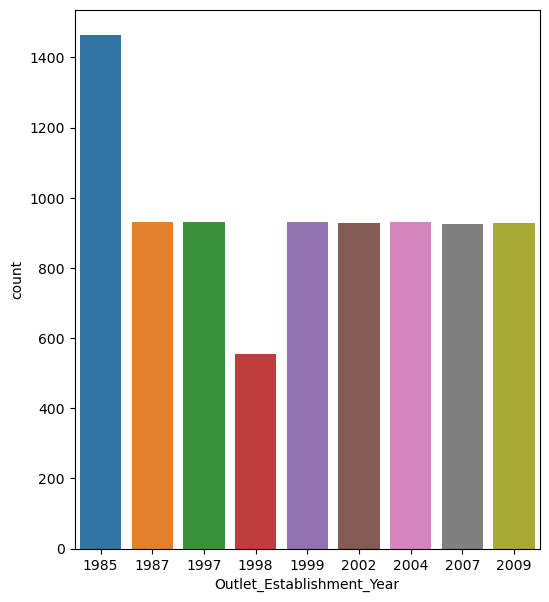

In [75]:
mm.figure(figsize = (6,7))
ss.countplot(x = 'Outlet_Establishment_Year' , data = a)
mm.show()

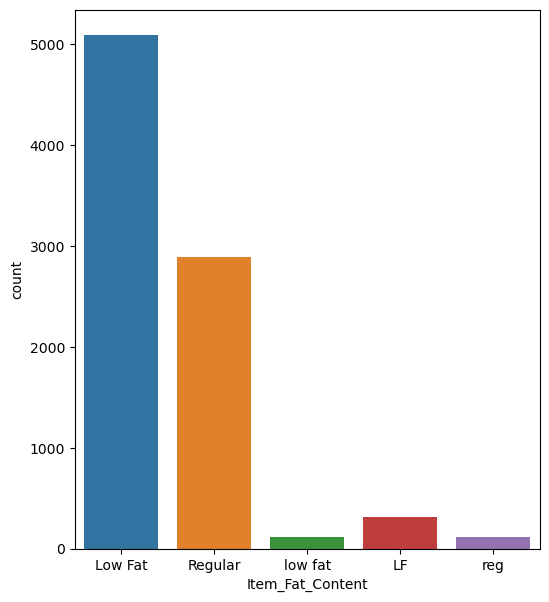

In [77]:
mm.figure(figsize = (6,7))
ss.countplot(x = 'Item_Fat_Content' , data = a)
mm.show()

<Axes: xlabel='Item_Fat_Content'>

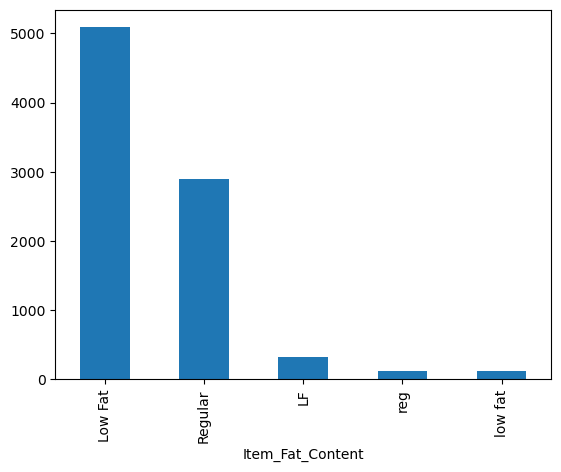

In [78]:
a['Item_Fat_Content'].value_counts().plot.bar()

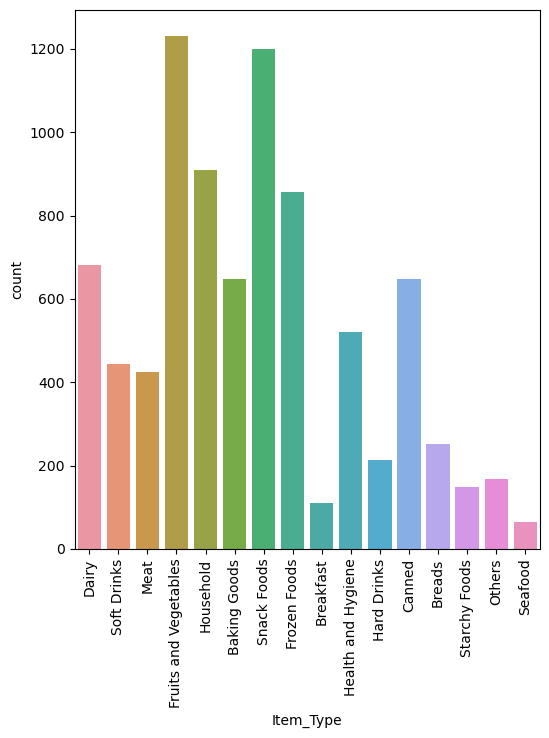

In [92]:
mm.figure(figsize = (6,7))
ss.countplot(x = 'Item_Type' , data = a)
mm.xticks(rotation = 'vertical')
mm.show()

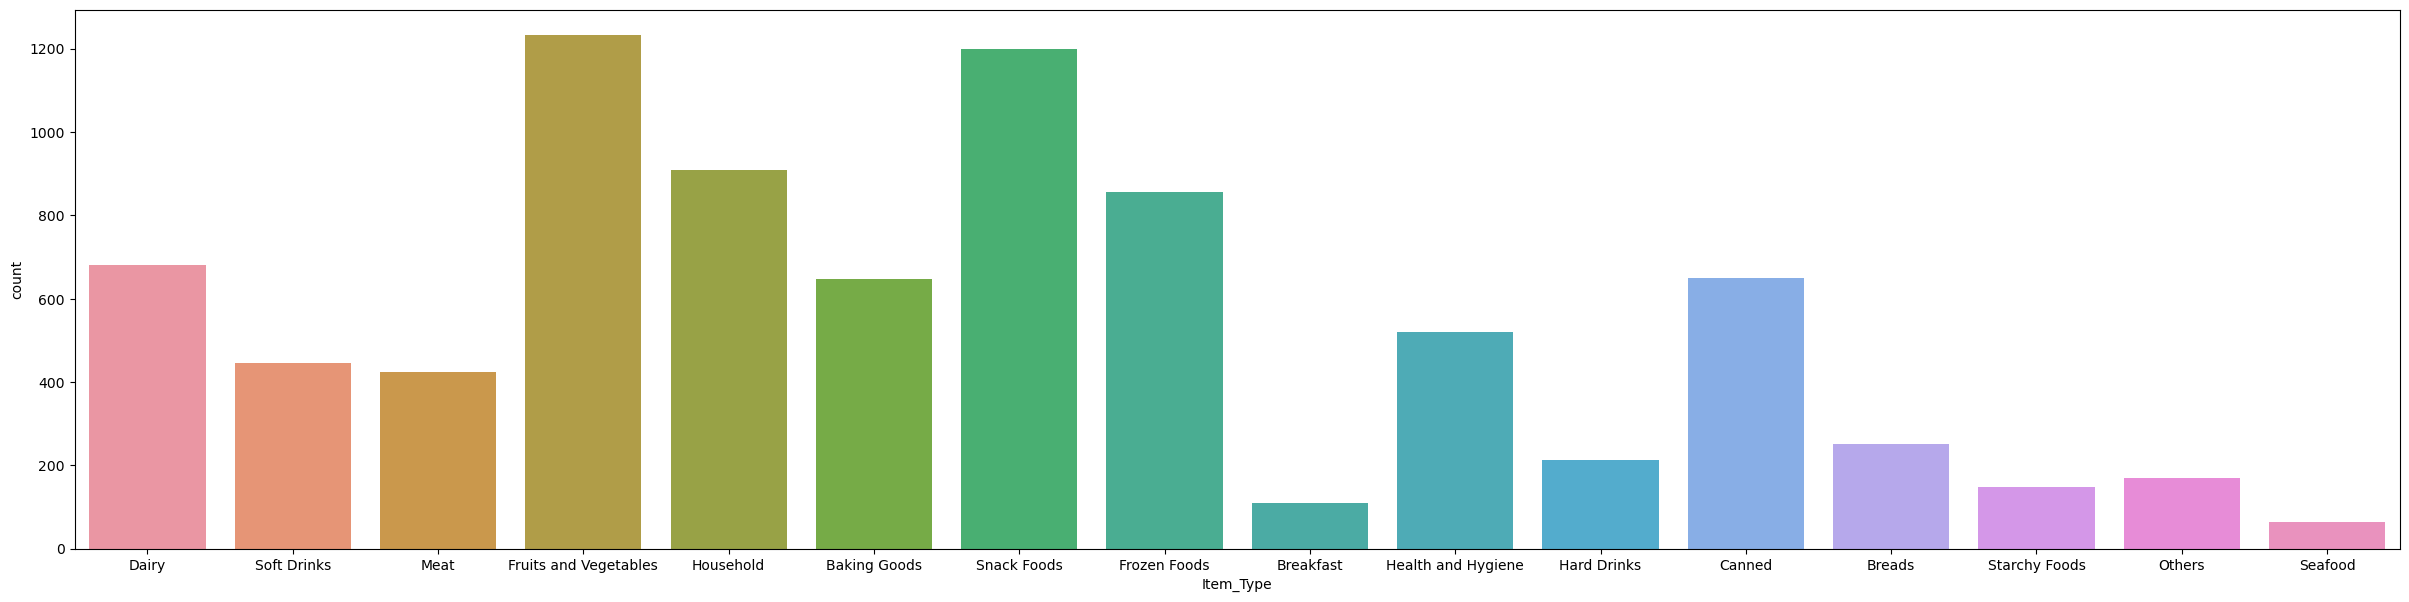

In [93]:
mm.figure(figsize = (30,7))
ss.countplot(x = 'Item_Type' , data = a)
#mm.xticks(rotation = 'vertical')
mm.show()

<Axes: xlabel='Outlet_Size'>

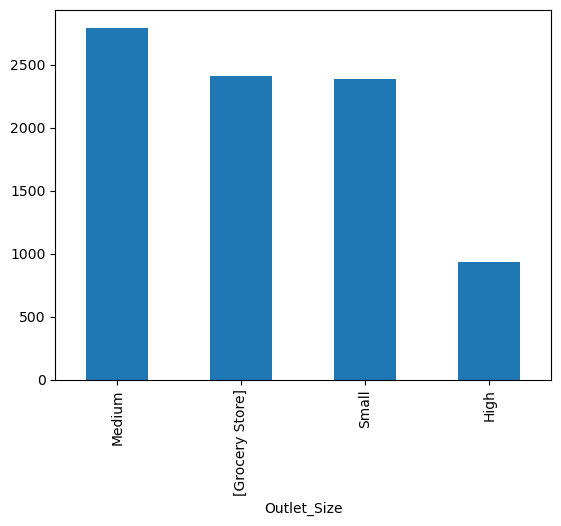

In [98]:
a['Outlet_Size'].value_counts().plot.bar()

In [116]:
le_Item_Identifier  = LabelEncoder()
le_Item_Fat_Content = LabelEncoder()
le_Item_Type = LabelEncoder()
le_Outlet_Size   = LabelEncoder()   
le_Outlet_Identifier = LabelEncoder()
le_Outlet_Location_Type  = LabelEncoder()      
le_Outlet_Type    = LabelEncoder()

In [133]:
a['id'] = le_Item_Identifier.fit_transform(a['Item_Identifier'])

a['fat'] = le_Item_Fat_Content.fit_transform(a['Item_Fat_Content'])

a['type'] = le_Item_Type.fit_transform(a['Item_Type'])

#a['siz'] = le_Outlet_Size.fit_transform(a['Outlet_Size'])

a['ident'] = le_Outlet_Identifier.fit_transform(a['Outlet_Identifier'])


a['loc'] = le_Outlet_Location_Type.fit_transform(a['Outlet_Location_Type'])

a['otype'] = le_Outlet_Type.fit_transform(a['Outlet_Type'])

In [122]:
a.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,id,fat,type,ident,loc,otype
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,1,4,9,0,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,2,14,3,2,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,1,10,9,0,1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800,1121,2,6,0,2,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297,1,9,1,2,1


In [130]:
b = a.drop(['Item_Identifier' , 'Item_Fat_Content', 'Item_Type' ,'Outlet_Size','Outlet_Identifier' ,'Outlet_Location_Type','Outlet_Type'],axis = 'columns')


In [131]:
b.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,id,fat,type,ident,loc,otype
0,9.30,0.016047,249.8092,1999,3735.1380,156,1,4,9,0,1
1,5.92,0.019278,48.2692,2009,443.4228,8,2,14,3,2,2
2,17.50,0.016760,141.6180,1999,2097.2700,662,1,10,9,0,1
3,19.20,0.000000,182.0950,1998,732.3800,1121,2,6,0,2,0
4,8.93,0.000000,53.8614,1987,994.7052,1297,1,9,1,2,1


In [140]:
aa = a.drop(['Item_Outlet_Sales'],axis=1)
bb = a['Item_Outlet_Sales']

In [141]:
aa_train , aa_test , bb_train , bb_test = train_test_split(aa, bb , test_size = 0.2, random_state = 2)

In [143]:
print(aa.shape , aa_train.shape , aa_test.shape)

(8523, 17) (6818, 17) (1705, 17)


In [151]:
regressor = XGBRegressor()

In [155]:
from sklearn import linear_model

In [164]:
r = linear_model.LinearRegression()
r.fit(b[['id','fat','type','ident','loc','otype','Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']],b.Item_Outlet_Sales)

LinearRegression()

In [166]:
r.predict([[8,2,14,3,2,2,5.92,0.019278,48.2692,2009]])

/Users/devanshgupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1329.05808396])